# Center of Mass calculations for softleg

<div>
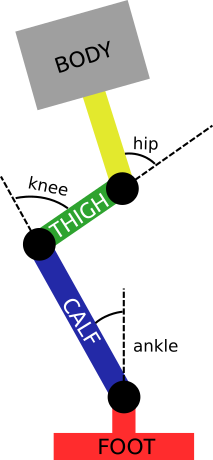
</div>



## Variables
Setting out all the variables we may have before doing the actual calculations

In [1]:
from sympy import *
from sympy import init_printing
init_printing()

In [2]:
from sympy.vector import CoordSys3D
N = CoordSys3D('N')

Defining state variable as functions of time

In [3]:
t = symbols('t')
ankle = Function('q1')(t)
knee = Function('q2')(t)
hip = Function('q3')(t)

Defining all geometrical values

In [4]:
h_foot, h_calf, h_thigh, h_hiplink, h_body = symbols('h_f h_c h_t h_h h_b')
m_foot, m_calf, m_thigh, m_hiplink , m_body = symbols('m_f m_c m_t m_b m')
cm_foot_rel = symbols('cmf')
cm_calf_rel = h_calf/2
cm_thigh_rel = h_thigh/2
cm_body_rel = (h_hiplink*m_hiplink + h_body*m_body)/(m_hiplink+m_body)

### Actual Calculations

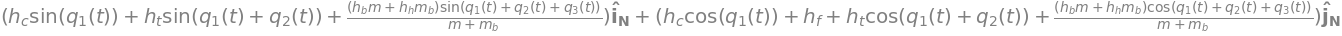

In [5]:
cm_foot = cm_foot_rel*N.j
cm_calf = h_foot*N.j + cm_calf_rel*sin(ankle)*N.i + cm_calf_rel*cos(ankle)*N.j
thigh_frame = h_foot*N.j + h_calf*sin(ankle)*N.i + h_calf*cos(ankle)*N.j
cm_thigh = thigh_frame + cm_thigh_rel*sin(knee+ankle)*N.i + cm_thigh_rel*cos(knee+ankle)*N.j
body_frame = thigh_frame + h_thigh*sin(knee+ankle)*N.i + h_thigh*cos(knee+ankle)*N.j
cm_body = body_frame + cm_body_rel*sin(knee+ankle+hip)*N.i + cm_body_rel*cos(knee+ankle+hip)*N.j
cm_body

Substituting the real values

In [6]:
real_values = {
    h_foot: 0.075,
    cm_foot_rel: 0.025,
    m_foot: 0.55,
    
    h_calf: 0.18,
    m_calf: 1,
    
    h_thigh: 0.12,
    m_thigh: 0.7,
    
    h_hiplink: 0.04,
    m_hiplink: 0.45,
    
    h_body: 0.15,
    m_body: 0.5,
}

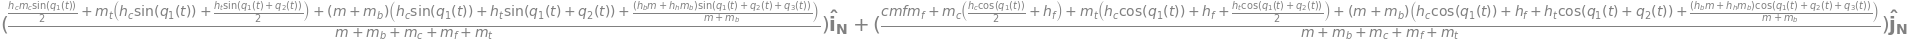

In [7]:
#cm_body = cm_body.subs(real_values)
m_tot = m_foot + m_calf + m_thigh + m_body+m_hiplink
CM = (cm_foot*m_foot + cm_calf*m_calf + cm_thigh*m_thigh + cm_body*(m_body+m_hiplink))/m_tot
CM

In [8]:
CM = CM.subs(real_values)
CM

In [9]:
CM_x = -(0.1209*sin(ankle)+0.0488*sin(ankle+knee)+0.0291*sin(ankle+knee+hip))
CM_y = 0.1209*cos(ankle)+0.0488*cos(ankle+knee)+0.0291*cos(ankle+knee+hip)

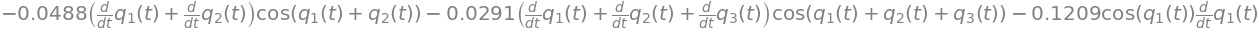

In [10]:
v_x = diff(CM_x,t)
v_x

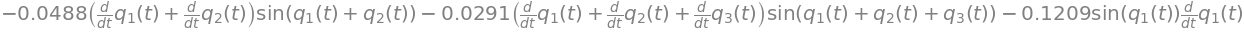

In [11]:
v_y = diff(CM_y,t)
v_y

In [14]:
m_tot = m_tot.subs(real_values)
v_in, g = symbols('v_in, g')
height = v_in*t - 0.5*g*t**2
height_diff = diff(height,t)
t_max = solve(height_diff,t)
max_height = height.subs({t: t_max[0]})
max_height

In [13]:
max_height-wanted_height

NameError: name 'wanted_height' is not defined

In [ ]:
wanted_height = 0.1
max_height = max_height.subs({g:9.81})
v = solve(max_height-wanted_height, v_in)
v[1]